In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, integrate, diff

In [76]:
#1
x_axis = np.array([0.4, 0.8, 1.2, 1.6, 2, 2.3])
y_axis = np.array([800, 975, 1500, 1950, 2900, 3600])

a,b = symbols('a, b')

def f(x):
    return a + b*x

phi = 0
for i in range (x_axis.size):
    phi += (f(x_axis[i]) - np.log10(y_axis[i])) ** 2

sol = solve([Eq(diff(phi, a), 0),
             Eq(diff(phi, b), 0)])

sol

{a: 2.73766242833211, b: 0.355535711058098}

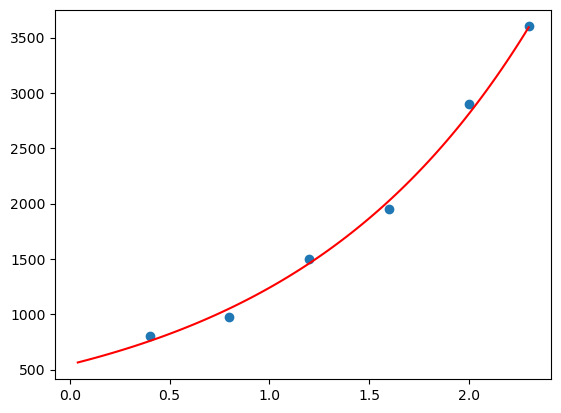

In [80]:
def expfunct(x):
    return np.power(10, (float(sol[a])+float(sol[b])*x))

xs = np.linspace(0.04, 2.3, 100)
plt.scatter(x_axis, y_axis)
plt.plot(xs, expfunct(xs), 'red')
plt.show()

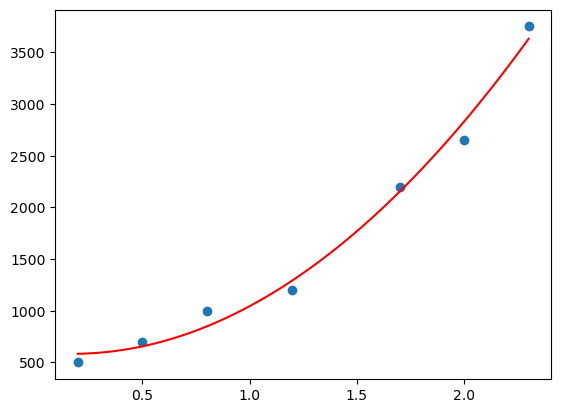

In [49]:
#2
xs = np.array([ 0.2, 0.5, 0.8, 1.2, 1.7, 2, 2.3])
ys = np.array([ 500, 700, 1000, 1200, 2200, 2650, 3750])

s = xs.size
A = np.zeros([3,3])
b = np.zeros([3])

for i in range (3):
    for k in range (s):
        b[i] += xs[k]**i * ys[k]
    for j in range (3):
        for k in range (s):
            A[i,j] += xs[k]**(i + j)

sol = np.linalg.solve(A,b)
sol

x_axis = np.linspace(0.2, 2.3, 100)
y_axis = sol[0] + sol[1]*x_axis + sol[2]*x_axis**2
plt.scatter(xs, ys)
plt.plot(x_axis, y_axis, 'red')
plt.show()

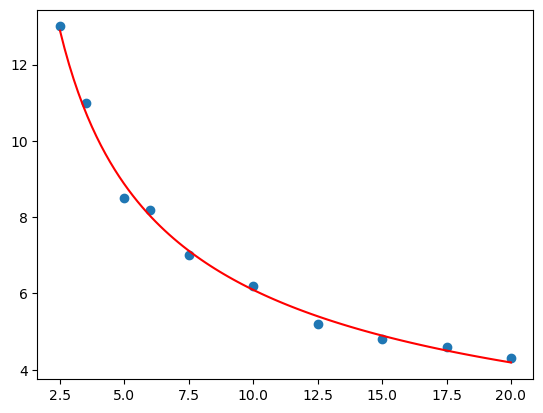

6.451452952701604

In [94]:
#3
xs = np.array([ 2.5, 3.5, 5, 6, 7.5, 10, 12.5, 15, 17.5, 20])
ys = np.array([ 13, 11, 8.5, 8.2, 7, 6.2, 5.2, 4.8, 4.6, 4.3])

a,b = symbols('a, b')

def f(a,b,x):
    return a + b*np.log(x)


def phi(a,b):
    sum = 0
    for i in range (xs.size):
        sum += (f(a,b,xs[i]) - np.log(ys[i]))**2
    return sum

sol = solve([Eq(diff(phi(a,b), a), 0),
        Eq(diff(phi(a,b), b), 0)])

def expFunct(x):
    return np.exp(float(sol[a]) + np.log(x)*(float(sol[b])))

x_axis = np.linspace(2.5, 20, 100)
plt.scatter(xs, ys)
plt.plot(x_axis, expFunct(x_axis), 'red')
plt.show()
expFunct(9)

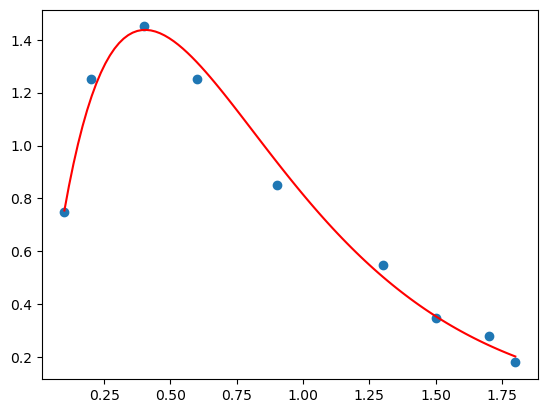

In [104]:
#4
xs = np.array([ 0.1, 0.2, 0.4, 0.6, 0.9, 1.3, 1.5, 1.7, 1.8])
ys = np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.28, 0.18])

s = xs.size
a,b = symbols('a, b')

def f(a,b,x):
    return a + np.log(x) + b*x

def phi(a,b):
    sum = 0
    for i in range(len(xs)):
        sum += (f(a,b,xs[i]) - np.log(ys[i]))**2
    return sum

equ = [Eq(diff(phi(a,b),a),0),
       Eq(diff(phi(a,b),b),0)]

sol = solve(equ)

def func(x):
    return np.exp(float(sol[a])+np.log(x)+float(sol[b])*x)

x_axis = np.linspace(0.1,1.8, 100)
plt.scatter(xs, ys)
plt.plot(x_axis, func(x_axis), 'red')
plt.show()

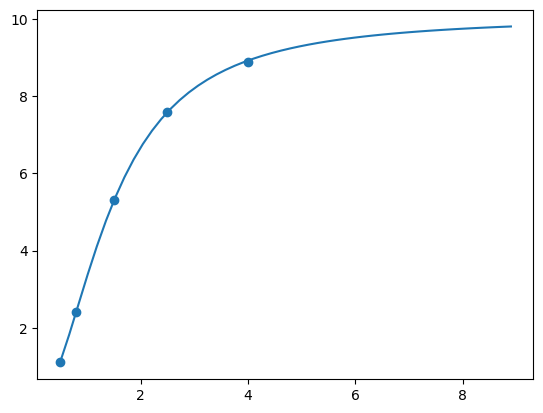

In [17]:
#5
c = np.array([ 0.5, 0.8, 1.5, 2.5, 4])
k = np.array([1.1, 2.4, 5.3, 7.6, 8.9])

def f(k,c,x):
    return (k*x**2) / (c + x**2)

a,b = symbols('a, b')

def ftrans(a,b,x):
    return a + b*x
    
c_new = np.array([1/node**2 for node in c])
k_new = np.array([1/value for value in k])

phi = 0

for i in range (c_new.size):
    phi+= (k_new[i] - ftrans(a,b,c_new[i]))**2

eq1 = Eq(diff(phi, a), 0)
eq2 = Eq(diff(phi, b), 0)
sols = solve([eq1, eq2])

new_coeffs = (1/sols[a], sols[b]/sols[a])

x_axis = np.linspace(min(c), max(k))
y_axis = f(new_coeffs[0], new_coeffs[1], x_axis)
plt.scatter(c, k)
plt.plot(x_axis, y_axis)

In [43]:
#7
from sympy import symbols, Eq, solve, integrate
import sympy as sp
import numpy as np

a = 0
b = 1

A1, x1, A2, x2, A3, x3, x, t = symbols('A1, x1, A2, x2, A3, x3, x, t')

def f(x):
    return sp.exp(sp.sin(x)) - 2*x**2

def phi(t):
    return ((a+b)/2 + (b-a)*t/2)

equations = [Eq(A1 + A2+A3, integrate(1, (x, -1, 1))), 
            Eq(A1*x1 + A2 * x2+A3*x3, integrate(x, (x, -1, 1))),
            Eq(A1*x1**2 + A2 * x2**2 + A3*x3**2, integrate(x**2, (x, -1, 1))),
            Eq(A1*x1**3 + A2 * x2**3 + A3*x3**3, integrate(x**3, (x, -1, 1))),
            Eq(A1*x1**4 + A2 * x2**4 + A3*x3**4, integrate(x**4, (x, -1, 1))),
            Eq(A1*x1**5 + A2 * x2**5 + A3*x3**5, integrate(x**5, (x, -1, 1)))
            ]

sol = solve(equations,A1, x1, A2, x2,A3,x3, dict = True)
print(sol[0])

print("Gaus three nodes:", 5/9*phi(-np.sqrt(15)/5)+5/9*phi(np.sqrt(15)/5)+8/9*phi(0))
func=integrate(f(x),(x,0,1)).evalf()
print(func)

{A1: 5/9, A2: 5/9, A3: 8/9, x1: -sqrt(15)/5, x2: sqrt(15)/5, x3: 0}
Gaus three nodes: 1.0
0.965202941751385


In [63]:
#8
def f(x):
    return -x**4 + 1
    
def trapezoids(a,b,f,nodes,n):
    sum = 0
    for i in range(1, n+1):
        sum+=(f(nodes[i-1]) + f(nodes[i]))
    sum*=(b-a)/(2*n)
    return sum

n = 4
nodes = np.linspace(-1, 1, n + 1)
print(trapezoids(-1, 1, f, nodes, n))

1.4375


In [67]:
#9
xs = np.array([0, 0.1, 0.2, 0.3, 0.4])
ys = np.array([1, 8, 4, 3.5, 5])

a = 0
b = 0.4

def simpson(a,b,ys, n):
    sum = 0
    for i in range(2, 2*n+1, 2):
        sum += ys[i-2] + 4*ys[i-1] + ys[i]
    sum*= (b-a)/(6*n)
    return sum

n = 2
print(simpson(a,b,ys,n))

2.0


In [8]:
#10
from scipy.integrate import quad

def f(x):
    return 1 - 1/np.tan(x)

eps = 1 / 10**5
a = -2
b = -1

def rect_helper(a,b,f,n):
    sum =0
    x = np.linspace(a, b, n + 1)
    for i in range(1,n+1):
        sum+= f((x[i-1]+x[i])/2)
    sum*=((b-a)/n)
    return sum

def rect(a,b,f,eps,exact):
    curr = 0
    for i in range (1,1001):
        curr= rect_helper(a,b,f,i)
        print(i,curr)
        if(abs(exact - curr) <= eps):
            return (i,curr)
    return (1000, curr)

exact=1.077520710173931
print(rect(a, b, f, eps, exact))

1 1.0709148443026524
2 1.0755632323414652
3 1.076614844167373
4 1.0770033225699112
5 1.0771871552496162
6 1.0772881382366244
7 1.0773494205704468
8 1.077389355901377
9 1.0774168093194503
10 1.0774364837271253
11 1.077451060603716
12 1.077462158968702
13 1.0774708029743805
14 1.077477666015237
15 1.0774832055358348
16 1.0774877410705541
17 1.0774915012694535
18 1.0774946532321639
19 1.077497321365121
20 1.0774995998289947
21 1.0775015609500374
22 1.0775032610242585
23 1.0775047443985077
24 1.0775060463891282
25 1.0775071954016602
26 1.0775082144920802
27 1.0775091225315863
28 1.077509935085927
29 1.077510665086509
30 1.0775113233477744
(30, 1.0775113233477744)
